<a href="https://colab.research.google.com/github/praveenbejo95/Cardiovascular-risk-prediction-ML-classification-project/blob/main/cardiovascular_Risk_prediction(Pravin_notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Importing required libraries

import numpy as np
import pandas as pd
from numpy import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [44]:
path = '/content/drive/MyDrive/Colab Notebooks/3rd ML (classification) project/data_cardiovascular_risk.csv'

In [45]:
# Loading the csv File

df = pd.read_csv(path)
df.head() # head of the data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [46]:
df.shape #Looking at the shape of the dataset

(3390, 17)

In [47]:
df.info()  #checks the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## **Preprocessing the dataset**

**Why do we need to handle missing values?**

* **The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first**

In [48]:
#Let's count how many missing values we have

df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**It shows the number of np.nan or null values or missing values are present in the dataset**

## **Duplicate values**

**Why is it important to remove duplicate records from my data?**

* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.**

In [49]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0



**It shows that there are no Duplicated Values present in the dataset.**

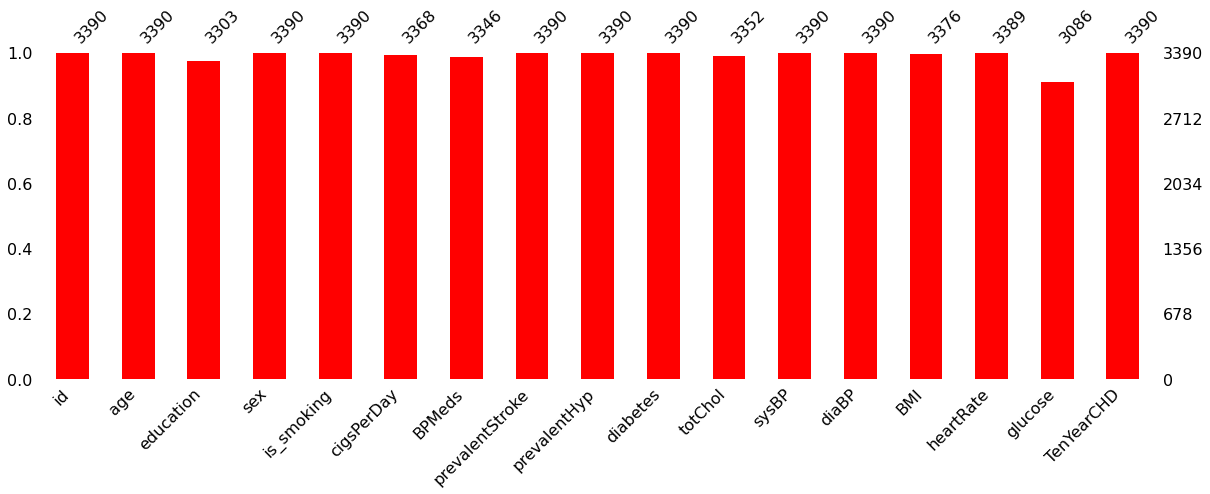

In [50]:
#Visualize missing data

import missingno as mn #this library shows the null values in a graph
mn.bar(df,figsize = (20,6),color = 'red')

In [51]:
print((df["glucose"].mode())[0])

75.0


In [52]:
df["glucose"].fillna((df["glucose"].mode())[0], inplace=True)

**Filling the missing spaces of glucosecolumn with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset**

In [53]:
df.dropna(inplace=True)
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Dropping all other rows containing missing values**

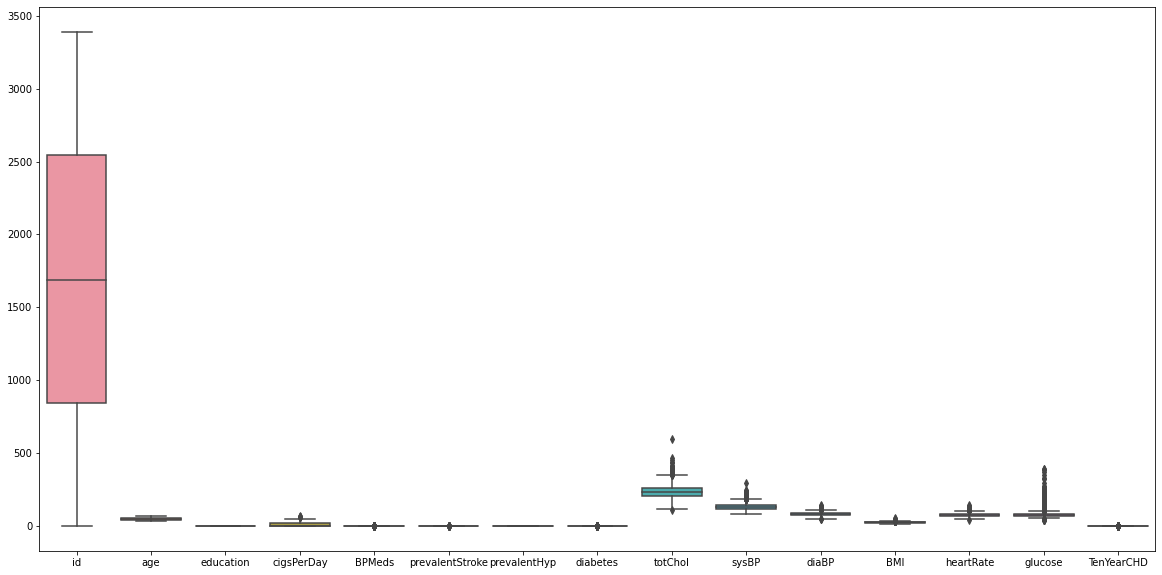

In [54]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

* **In the above boxplot we see that the id variable is not neccessary for our data so we easily can drop it.**
* **Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.**

In [55]:
df.drop(['id'],axis=1,inplace=True)

In [56]:
df['totChol'].max()

600.0

**The Outlier present in totChol is 600.**

In [57]:
df['sysBP'].max()

295.0

**The Outlier present in sysBP is 295.**

In [58]:
df = df[df['totChol']<600.0]
df = df[df['sysBP']<295.0]
df.shape

(3187, 16)

**Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA**

## **Exploratory Data Analysis**

In [59]:
#Looking for the description of the dataset to get insights of the data

df.describe().transpose() #Statistical aspect of the dataframe

,count,mean,std,min,25%,50%,75%,max
age,3187.0,49.418575,8.554900,32.00,42.000,49.00,56.000,70.0
education,3187.0,1.973015,1.018609,1.00,1.000,2.00,3.000,4.0
cigsPerDay,3187.0,9.103859,11.866153,0.00,0.000,0.00,20.000,70.0
BPMeds,3187.0,0.029495,0.169215,0.00,0.000,0.00,0.000,1.0
prevalentStroke,3187.0,0.005962,0.076994,0.00,0.000,0.00,0.000,1.0
prevalentHyp,3187.0,0.312833,0.463720,0.00,0.000,0.00,1.000,1.0
diabetes,3187.0,0.025102,0.156459,0.00,0.000,0.00,0.000,1.0
totChol,3187.0,236.849702,44.084212,113.00,206.000,234.00,264.000,464.0
sysBP,3187.0,132.376843,21.990752,83.50,117.000,128.00,143.500,248.0
diaBP,3187.0,82.821305,11.960124,48.00,74.500,82.00,89.500,142.5


## **Features description**
**Breakdown of Our Features:**

* **Sex: male or female("M" or "F")**

* **Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral**

* **is_smoking: whether or not the patient is a current smoker ("YES" or "NO")**

* **Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)**

* **BP Meds: whether or not the patient was on blood pressure medication (Nominal)**

* **Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)**

* **Prevalent Hyp: whether or not the patient was hypertensive (Nominal)**

* **Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)**

* **Tot Chol: total cholesterol level (Continuous)**

* **Sys BP: systolic blood pressure (Continuous)**

* **Dia BP: diastolic blood pressure (Continuous)**

* **BMI: Body Mass Index (Continuous)**

* **Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)**

* **Glucose: glucose level (Continuous)**

Predict variable (desired target)

* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV**